# PROJECT: Classifying Cow’s activities

## AIM : Classify Cow’s activities into 9 categories based on Data collected from IMU SENSORS

### Data
#### IMU Data (Accelerometer, Gyroscope, Magnetometer)
#### What is IMU?
Inertial measurement unit, used to describe a collection of measurement 
tools, when installed in some device, catches movement with the help of 
accelerometer, gyroscope and magnetometer, in 3d space.

#### Variable names:-
* acc_x,acc_y,acc_z: accelerometer output for all 3 dimensions movement.
* gyr_x,gyr_y,gyr_z: gyroscope outputs, it measures rotation, rotation rate 
(angular velocity).
* mag_x,mag_y,mag_z: magnetometer outputs, catches magnetic field 
around the device.
* All three (Acc, Gyr, Mag) gives output in different SI Units i.e The scale for all three are different, so Data must be normalized

##### Classes and their Encoded values:-
* eating = 1
* drinking = 2
* walking = 3
* standing =4
* lying = 5
* ruminating standing = 6
* ruminating lying = 7
* grooming = 8
* idle/other = 9

#### Notebook Contents :
1. Dataset Information
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Modeling
5. Conclusion

### 1. Dataset Information

In [1]:
#importing the common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
drinking = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\D2_train.csv')
eating = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\E1_train.csv')
walking = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\W3_train.csv') 
grooming = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\G8_train.csv')
idle = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\I9_train.csv')
lying = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\L5_train.csv')
ruminating_lying = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\RL7_train.csv')
ruminating_standing = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\RS6_train.csv')
standing = pd.read_csv(r'D:\dsap class\project\COW DATASET\Classify cow positions using Machine Learning\S4_train.csv')

In [3]:
# concatenating all the csv files
df = pd.concat([drinking, eating, walking, grooming, idle, lying, ruminating_lying, ruminating_standing, standing])

In [4]:
#viewing the concatenated dataset
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0,2
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0,2
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5,2
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5,2
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5,2
...,...,...,...,...,...,...,...,...,...,...,...
2539801,1628397674,0.296875,0.908691,0.293457,0.000000,-1.953125,3.540039,-643.5,880.5,202.5,4
2539802,1628397674,0.298828,0.915527,0.294434,0.610352,-2.624512,2.563477,-637.5,903.0,216.0,4
2539803,1628397674,0.301270,0.911133,0.295410,1.037598,-2.746582,3.112793,-622.5,885.0,220.5,4
2539804,1628397674,0.301758,0.920410,0.284668,2.014160,-2.868652,3.662109,-621.0,909.0,192.0,4


In [5]:
#to check the number of rows n columns
df.shape

(12263524, 11)

In [6]:
#checking for null values
df.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

### 2. Exploratory Data Analysis

In [7]:
#checking how many rows and columns are present
df.shape

(12263524, 11)

In [8]:
#getting to know the column names
df.columns

Index(['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z', 'label'],
      dtype='object')

In [9]:
#creating a function to create a table that has feature_name, dtype, missing values and the number of unique values
def insights_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature_name'] = summary['index']
    summary = summary[['Feature_name','dtypes']]
    summary['Missing_values'] = df.isnull().sum().values    
    summary['No. Uniques_values'] = df.nunique().values
    return summary
insights_table(df)

,Feature_name,dtypes,Missing_values,No. Uniques_values
0,time,int64,0,106341
1,acc_x,float64,0,6843
2,acc_y,float64,0,9373
3,acc_z,float64,0,7552
4,gyr_x,float64,0,9525
5,gyr_y,float64,0,11236
6,gyr_z,float64,0,6473
7,mag_x,float64,0,1280
8,mag_y,float64,0,1920
9,mag_z,float64,0,1404


#### Observation:
1. Missing Data : we don't have any missing data.
2. There is no object type data, all are either int or float.

In [10]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07
mean,1.628243e+09,-2.807402e-02,6.211683e-01,1.081455e-01,8.722215e-01,-1.837340e+00,-6.375345e-01,-2.934089e+02,4.300977e+02,2.037158e+02,4.320899e+00
std,1.205662e+05,2.622167e-01,7.084800e-01,1.888613e-01,1.282481e+01,2.014151e+01,1.030093e+01,2.736141e+02,5.969720e+02,4.382996e+02,2.417436e+00
min,1.628067e+09,-1.599756e+01,-1.314160e+01,-1.599121e+01,-1.999756e+03,-1.998779e+03,-1.999756e+03,-1.534500e+03,-1.057500e+03,-1.152000e+03,1.000000e+00
25%,1.628106e+09,-2.182617e-01,8.281250e-01,3.173830e-02,-2.014160e+00,-5.676270e+00,-2.685547e+00,-4.635000e+02,-4.950000e+01,6.900000e+01,1.000000e+00
50%,1.628312e+09,-2.490230e-02,9.370118e-01,1.230469e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.535000e+02,1.395000e+02,3.165000e+02,4.000000e+00
75%,1.628335e+09,1.616211e-01,9.736329e-01,2.006836e-01,3.723145e+00,1.892090e+00,1.464844e+00,-1.260000e+02,9.795000e+02,5.520000e+02,6.000000e+00
max,1.628421e+09,1.051514e+01,1.182617e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.973511e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


In [11]:
df['label'].value_counts()

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

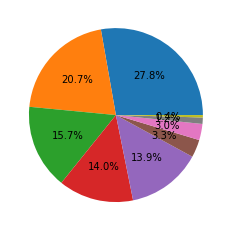

In [12]:
#distribution of df
plt.pie(df['label'].value_counts(), autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

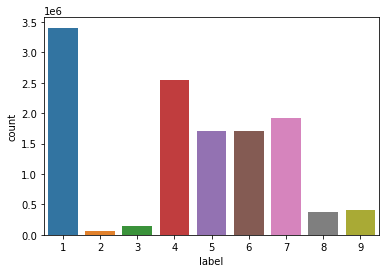

In [13]:
#understanding our target variable
sns.countplot(df['label'])

In [14]:
#checking the percentage of each class of the target variable present in the data
(df['label'].value_counts()/len(df['label']))*100

1    27.770990
4    20.710246
7    15.729312
5    13.957546
6    13.892279
9     3.304621
8     3.005718
3     1.185377
2     0.443910
Name: label, dtype: float64

##### Observation:
The target variables are imbalanced!

### Correlation

In [15]:
df.corr()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
time,1.000000,-0.108821,-0.118527,0.054428,-0.005030,-0.002011,-0.008394,0.187664,0.066354,0.032587,-0.156390
acc_x,-0.108821,1.000000,0.068235,-0.064783,-0.001430,0.006372,-0.004203,-0.481286,0.068210,0.144633,0.181582
acc_y,-0.118527,0.068235,1.000000,-0.227910,-0.023733,0.006674,0.020762,-0.025147,0.382588,0.574042,-0.018375
acc_z,0.054428,-0.064783,-0.227910,1.000000,0.012389,-0.009027,-0.010025,0.157934,-0.198680,-0.337945,-0.109248
gyr_x,-0.005030,-0.001430,-0.023733,0.012389,1.000000,-0.009946,-0.088246,-0.004642,-0.009834,-0.033924,0.000211
gyr_y,-0.002011,0.006372,0.006674,-0.009027,-0.009946,1.000000,0.041503,-0.008726,0.005924,0.013075,0.002118
gyr_z,-0.008394,-0.004203,0.020762,-0.010025,-0.088246,0.041503,1.000000,0.004679,-0.006413,0.022479,0.001470
mag_x,0.187664,-0.481286,-0.025147,0.157934,-0.004642,-0.008726,0.004679,1.000000,-0.323132,-0.168128,-0.160687
mag_y,0.066354,0.068210,0.382588,-0.198680,-0.009834,0.005924,-0.006413,-0.323132,1.000000,0.179491,0.070915
mag_z,0.032587,0.144633,0.574042,-0.337945,-0.033924,0.013075,0.022479,-0.168128,0.179491,1.000000,0.069653


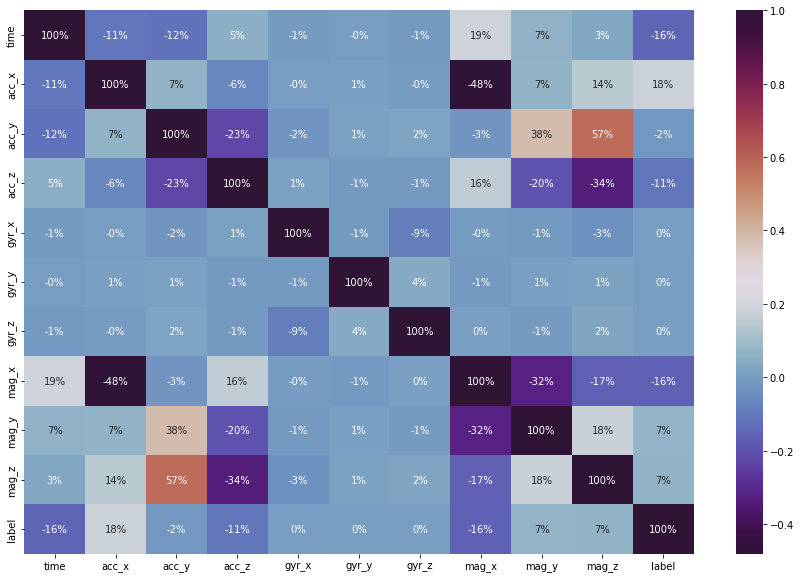

In [16]:
#checking the correlation between all the features
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="twilight_shifted", fmt = '.0%' )
plt.show()

<AxesSubplot:>

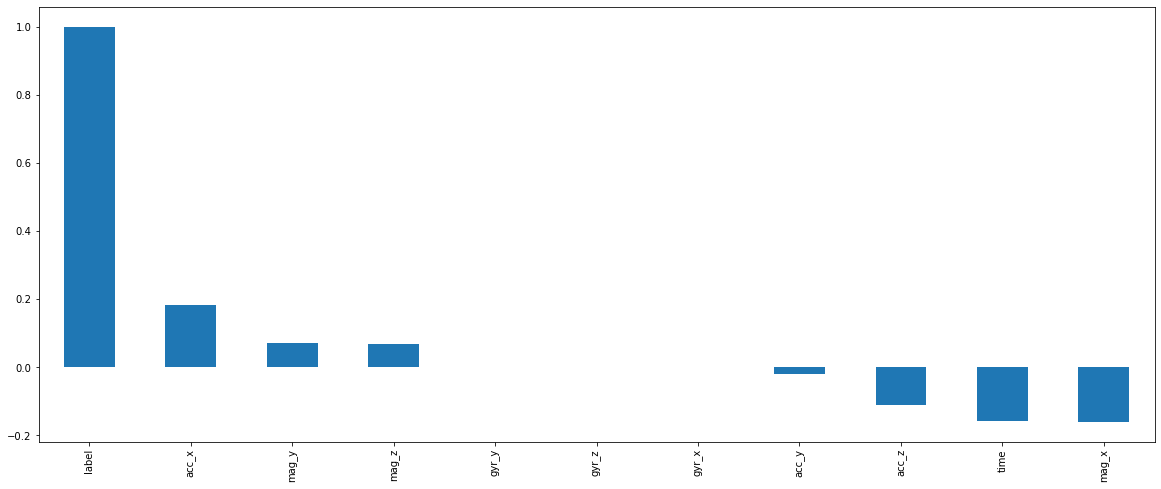

In [17]:
plt.figure(figsize=(20,8))
df.corr()['label'].sort_values(ascending = False).plot(kind='bar')

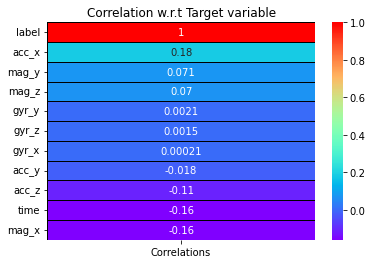

In [18]:
corr = df.corrwith(df['label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
sns.heatmap(corr,annot = True,cmap = 'rainbow',linewidths = 0.6,linecolor = 'black');
plt.title('Correlation w.r.t Target variable');

##### Seperating the dependent and independent variables

In [19]:
#seperating the x and y variables
x = df.drop('label', axis = 1) #independent features  
#x = df.iloc[:,:-1]

y = df['label'] #dependent features
#y = df.iloc[:,-1]

In [20]:
#defining a variable named column_name n giving it all the column names expect label
column_name = ['time','acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z']

##### Checking for outliers

In [21]:
# Using a for loop inside a function to get the box plots(seaborn) of all the columns
def identify_outliers(give_df_name, give_column_name):
    for i in column_name:
        fig = plt.figure(figsize=(6,8))
        sns.boxplot(data = x, y = i)
plt.show()

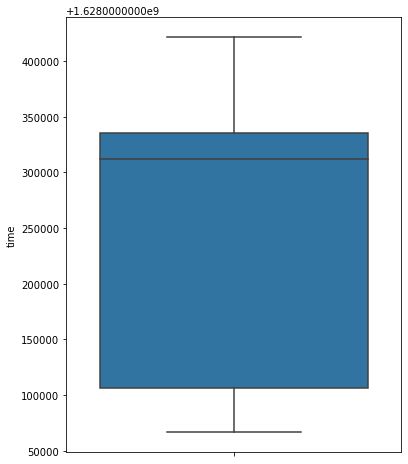

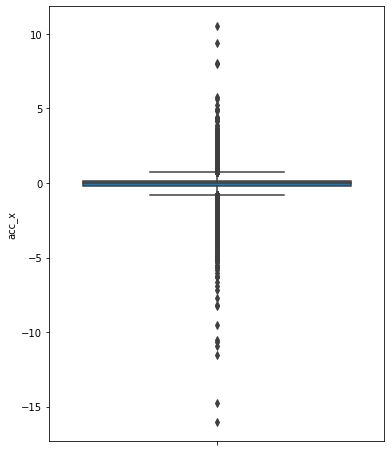

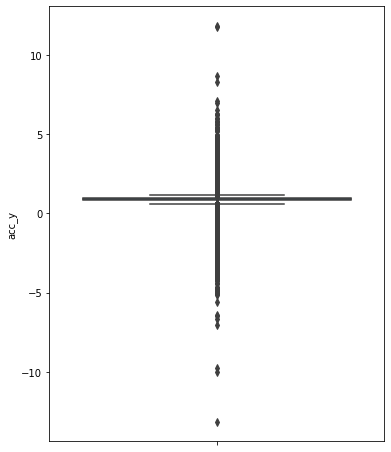

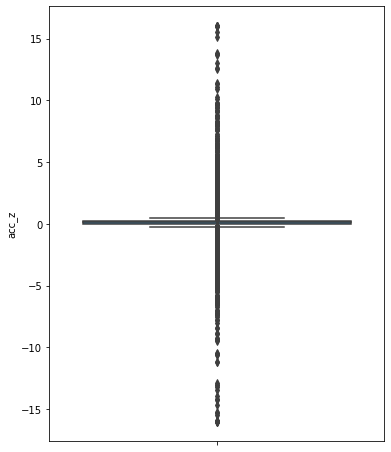

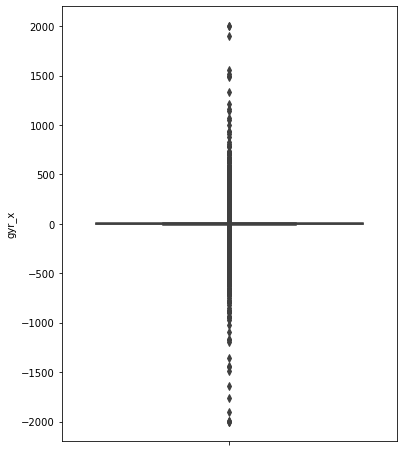

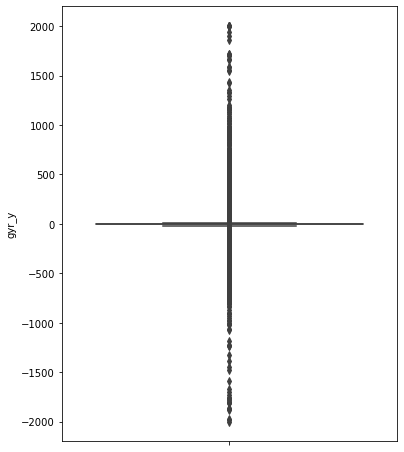

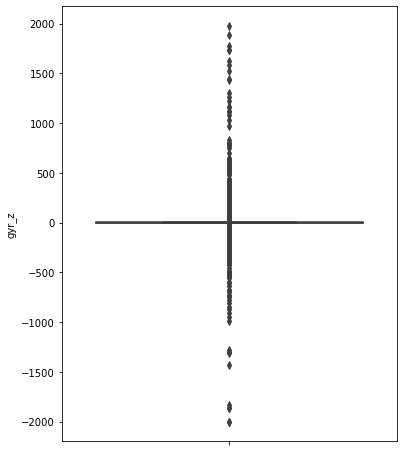

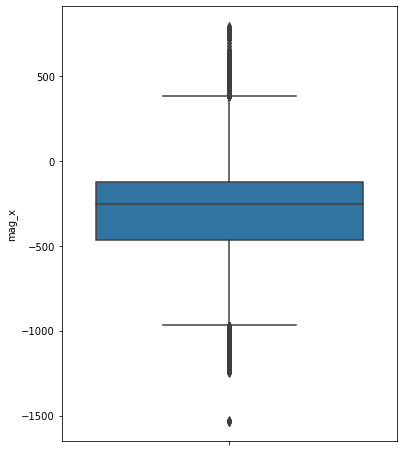

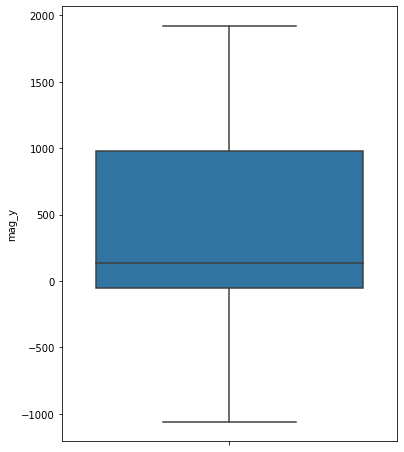

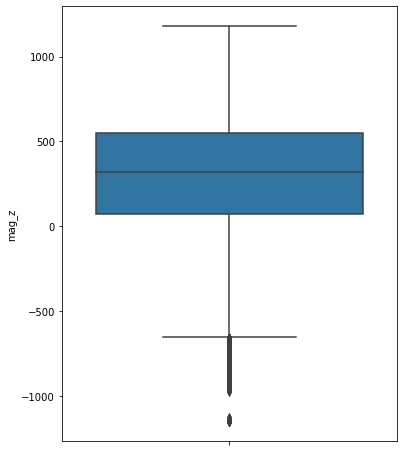

In [22]:
identify_outliers(x, column_name)

### 3. Feature Engineering

##### Replacing the outliers with meadian value

In [23]:
# Using a for loop inside a function to replace the outliers with median value
def replace_outlier(x, column_name):
    for i in column_name:
        print('column name : ',i)
        Q1 = np.percentile(x[i], 25)
        Q2 = np.percentile(x[i], 50)
        Q3 = np.percentile(x[i], 75)
        IQR = Q3 - Q1
        print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        x.loc[x[i] > upper_val, i] = np.median(x[i])
        x.loc[x[i] < lower_val, i] = np.median(x[i])
        
        fig = plt.figure(figsize = (6,8))
        sns.boxplot(data = x,y = i)
        plt.xticks(rotation = 'horizontal')
        plt.show()

column name :  time
Q1 = 1628105948.0 Q2 =  1628312235.0 Q3 =  1628335043.0
upper 1628678685.5
lower 1627762305.5


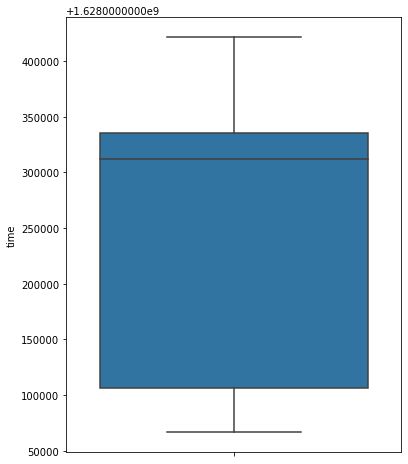

column name :  acc_x
Q1 = -0.2182617000000001 Q2 =  -0.0249023 Q3 =  0.1616211
upper 0.7314453000000001
lower -0.7880859000000002


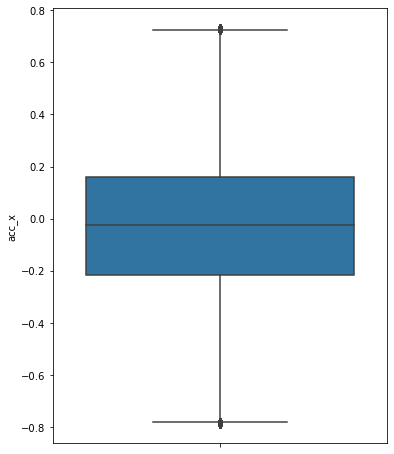

column name :  acc_y
Q1 = 0.828125 Q2 =  0.9370118 Q3 =  0.9736329
upper 1.1918947500000001
lower 0.60986315


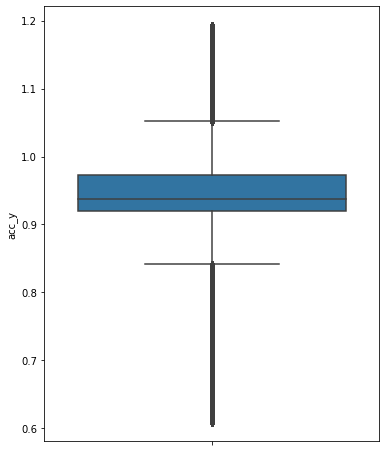

column name :  acc_z
Q1 = 0.0317383 Q2 =  0.1230469 Q3 =  0.2006836
upper 0.45410154999999996
lower -0.22167965


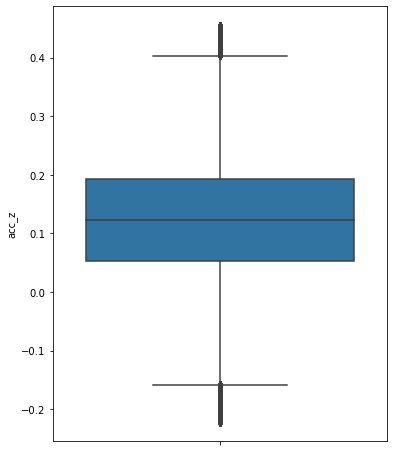

column name :  gyr_x
Q1 = -2.0141601 Q2 =  0.8544921999999998 Q3 =  3.7231445
upper 12.329101399999999
lower -10.620116999999999


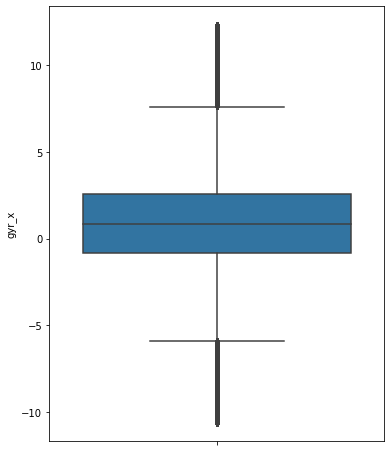

column name :  gyr_y
Q1 = -5.6762695 Q2 =  -1.8920898 Q3 =  1.8920898
upper 13.24462875
lower -17.02880845


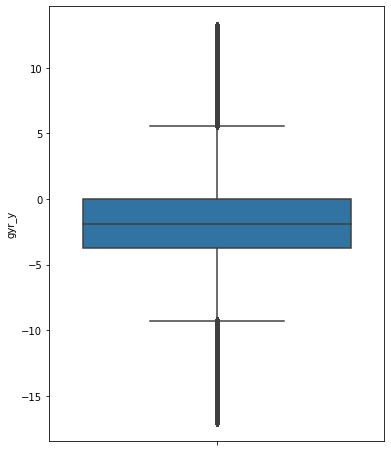

column name :  gyr_z
Q1 = -2.6855469 Q2 =  -0.6103516 Q3 =  1.4648437
upper 7.6904296
lower -8.911132799999999


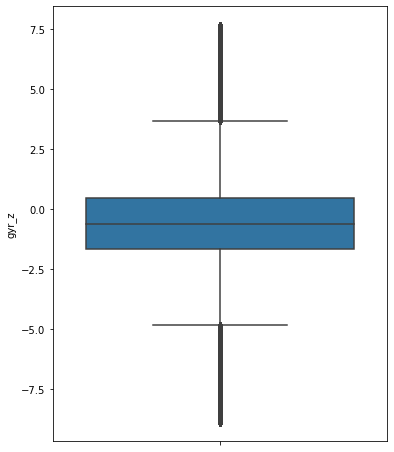

column name :  mag_x
Q1 = -463.5 Q2 =  -253.5 Q3 =  -126.0
upper 380.25
lower -969.75


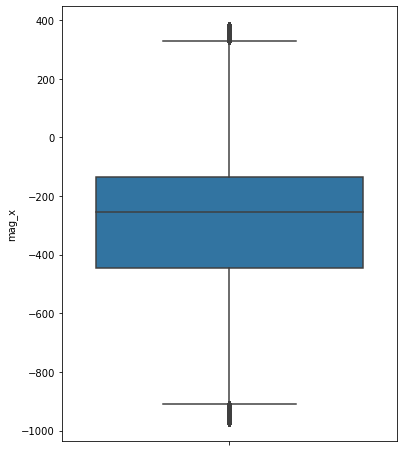

column name :  mag_y
Q1 = -49.5 Q2 =  139.5 Q3 =  979.5
upper 2523.0
lower -1593.0


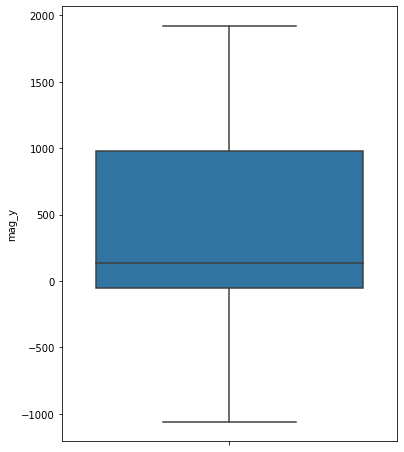

column name :  mag_z
Q1 = 69.0 Q2 =  316.5 Q3 =  552.0
upper 1276.5
lower -655.5


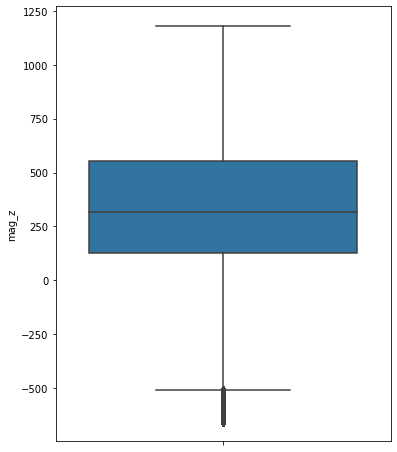

In [24]:
replace_outlier(x, column_name)

##### looking for outliers after imputing with median

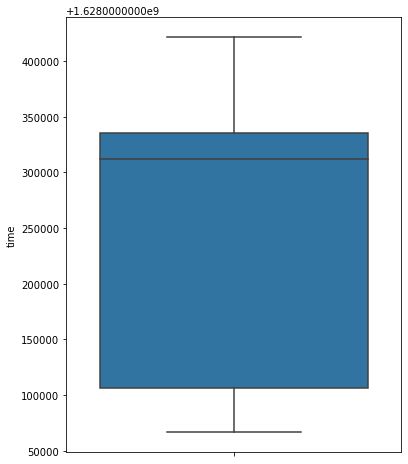

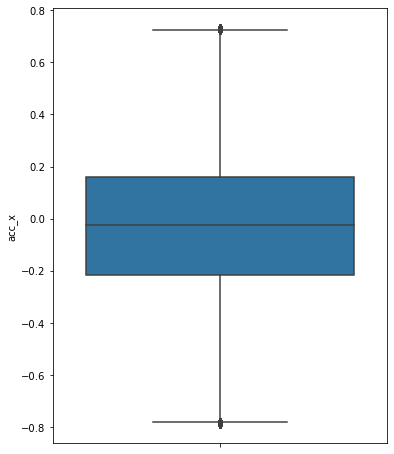

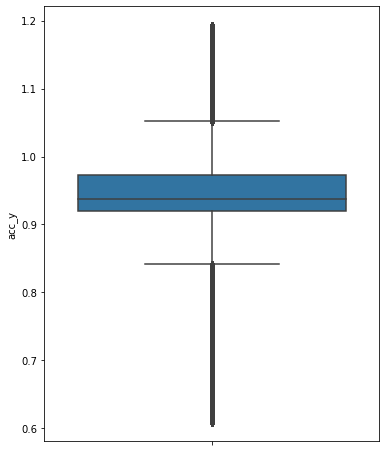

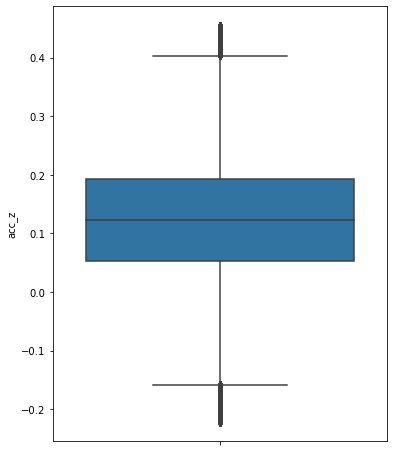

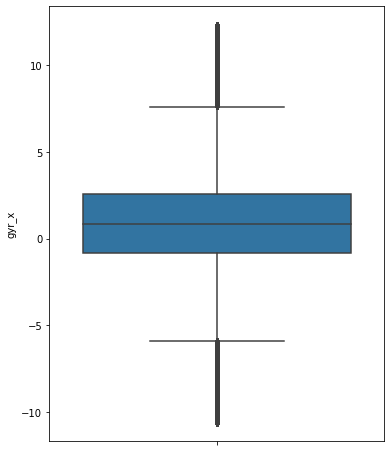

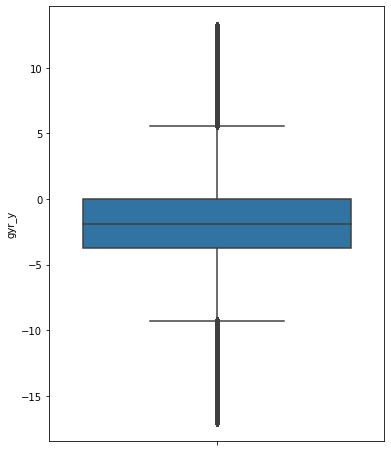

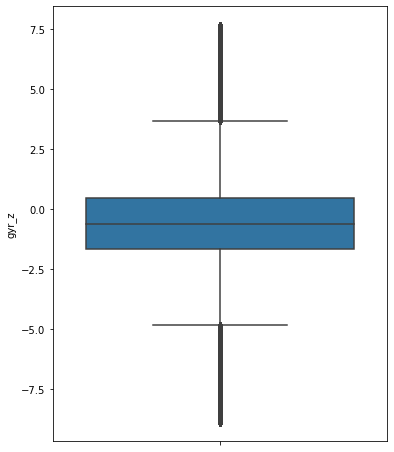

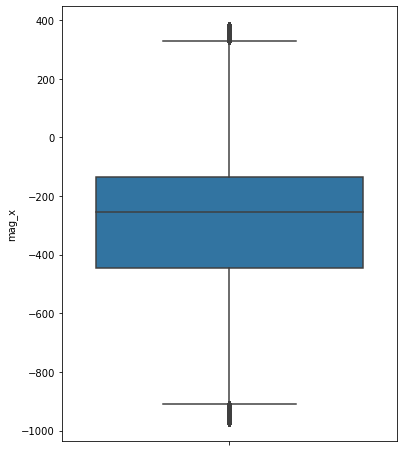

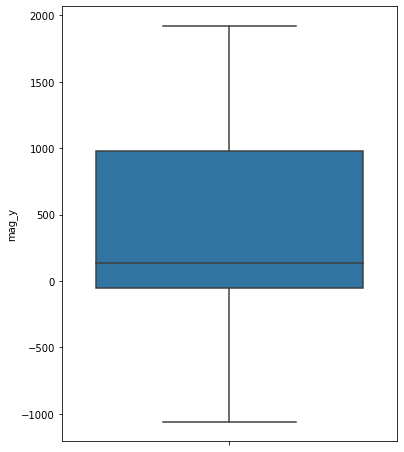

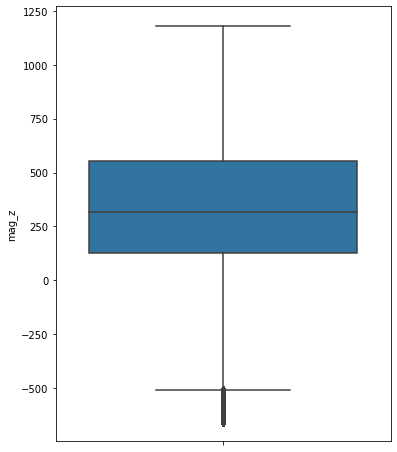

In [25]:
identify_outliers(x, column_name)

##### Observation
Outliers are now imputed with the median value

#### Normalization

All three (Acc, Gyr, Mag) gives output in different SI Units i.e The scale for all three are different, so Data must be normalized

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(x)

array([[0.03725611, 0.3953713 , 0.79278516, ..., 0.32814238, 0.83820565,
        0.6369583 ],
       [0.03725611, 0.42815819, 0.84060391, ..., 0.32703003, 0.83366935,
        0.62714636],
       [0.03725611, 0.53712634, 0.76258386, ..., 0.3403782 , 0.83215726,
        0.62142273],
       ...,
       [0.93311879, 0.71681137, 0.51761761, ..., 0.25695217, 0.65272177,
        0.47751431],
       [0.93311879, 0.71713276, 0.53355714, ..., 0.25806452, 0.66078629,
        0.46197874],
       [0.93311879, 0.71681137, 0.51761761, ..., 0.24026696, 0.6577621 ,
        0.4627964 ]])

In [27]:
x_normalized = pd.DataFrame(scaling.fit_transform(x))
x_normalized.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.5,0.5,0.328142,0.838206,0.636958
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.5,0.5,0.327030,0.833669,0.627146
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.5,0.5,0.340378,0.832157,0.621423


In [28]:
x_normalized = pd.DataFrame(scaling.fit_transform(x),columns = x.columns)
x_normalized.head(3)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.5,0.5,0.328142,0.838206,0.636958
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.5,0.5,0.327030,0.833669,0.627146
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.5,0.5,0.340378,0.832157,0.621423


### Feature Selection
#### Selecting KBest Features using chi2

In [29]:
#select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(6, 'k_score'))

  features        k_score
0     time  551696.294963
1    acc_x  150058.553659
7    mag_x  106664.110641
8    mag_y   67694.199464
3    acc_z   43636.740650
2    acc_y   36914.462173


##### Observation:
* From chi2 we see that the top 6 features are time, acc_x, mag_x, mag_y, acc_z, acc_y

#### Creating a new dataframe with x_normalized and y values/

In [32]:
new_df = x_normalized
new_df['label'] = y.values
new_df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.500000,0.500000,0.328142,0.838206,0.636958,2
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.500000,0.500000,0.327030,0.833669,0.627146,2
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.500000,0.500000,0.340378,0.832157,0.621423,2
3,0.037256,0.618451,0.603188,0.633864,0.500000,0.500000,0.837037,0.325918,0.835181,0.627964,2
4,0.037256,0.631308,0.469799,0.693922,0.459893,0.500000,0.374074,0.328142,0.832661,0.632870,2
...,...,...,...,...,...,...,...,...,...,...,...
12263519,0.933119,0.713918,0.513423,0.762663,0.462567,0.497976,0.751852,0.241379,0.651210,0.467702,4
12263520,0.933119,0.715204,0.525168,0.764110,0.489305,0.475709,0.692593,0.245829,0.658770,0.475061,4
12263521,0.933119,0.716811,0.517618,0.765557,0.508021,0.471660,0.725926,0.256952,0.652722,0.477514,4
12263522,0.933119,0.717133,0.533557,0.749638,0.550802,0.467611,0.759259,0.258065,0.660786,0.461979,4


### 4. Modeling

#### As the Dataset is quite huge, 
##### i. lets take sample data from population data
##### ii. build a differnt model on each sample
##### iii. check which model gives good results 

### Sample 1 - df1 - Logistic Regression

In [33]:
# taking a sample of 40,000
import random
df1 = new_df.sample(40000)
df1.shape

(40000, 11)

In [34]:
df1['label'].value_counts()

1    11212
4     8254
7     6168
5     5575
6     5549
9     1404
8     1204
3      458
2      176
Name: label, dtype: int64

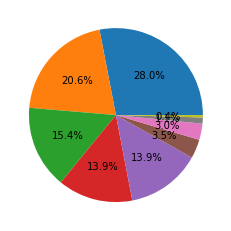

In [35]:
#distribution of sample df1
plt.pie(df1['label'].value_counts(), autopct = '%1.1f%%');

In [36]:
#importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

#for confusion matrix
import scikitplot as skplot

# for smote
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

Data Balancing using SMOTE :
In order to cope with imbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.

Oversampling : Increase the minority samples of the target variable to the majority samples.
we have decided to go with oversampling beacuse we might lose data if we do undersampling

For data balancing, we will use imblearn.

pip statement : !pip install imbalanced-learn

In [37]:
# Splitting x and y variables
x1 = df1[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y1 = df1['label'] #dependent features

Taking only the 6 best features we got from chi2 

In [38]:
print(x1.shape, y1.shape)

(40000, 6) (40000,)


In [39]:
#splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
print(x1_train.shape, y1_train.shape, x1_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y1_train),'\n')

# applying smote to handle imbalance in the target variable
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x1_train,y1_train = oversample.fit_resample(x1_train,y1_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y1_train),'\n')

# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 1000, multi_class = 'multinomial',penalty='none')

#fitting the logistic regression model to x1_train and y1_train
classifier_lr.fit(x1_train, y1_train)
y1_pred = classifier_lr.predict(x1_test)
print('model.predict :',y1_pred)
print('model.score :', classifier_lr.score(x1_train, y1_train))

#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y1_test, y1_pred)
print('Accuracy : ',accuracy_lr)

from sklearn.model_selection import cross_val_score
cv_scores_lr = cross_val_score(classifier_lr, x1, y1, cv=5)
print('Cross Validation scores :', cv_scores_lr)

mean_cv_lr = (np.mean(cv_scores_lr))*100
print('Mean cv :',mean_cv_lr)

(28000, 6) (28000,) (12000, 6)
Classes and number of values in trainset before SMOTE: Counter({1: 7831, 4: 5782, 7: 4304, 5: 3913, 6: 3882, 9: 984, 8: 850, 3: 321, 2: 133}) 

Classes and number of values in trainset after SMOTE: Counter({4: 7831, 5: 7831, 1: 7831, 7: 7831, 6: 7831, 8: 7831, 3: 7831, 9: 7831, 2: 7831}) 

model.predict : [2 1 4 ... 4 4 6]
model.score : 0.3597951162757701
Accuracy :  0.31875
Cross Validation scores : [0.419875 0.42225  0.429125 0.41875  0.422125]
Mean cv : 42.24249999999999


In [40]:
#f1_score
f1_score_lr = f1_score(y1_test, y1_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_lr))

#precision
precision_score_lr = precision_score(y1_test, y1_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_lr))

#recall
recall_score_lr = recall_score(y1_test, y1_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_lr))

F1-score (average = weighted): 0.33
Precision (average = weighted): 0.44
Recall (average = weighted): 0.32


1. F1 score
average = 'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

2. precison
average = 'weighted'
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

3. recall
average = 'weighted'
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall. Weighted recall is equal to accuracy.

### Sample 2 - df2 - Decision Tree Classifier

In [41]:
# taking a sample of 40,000
import random
df2 = new_df.sample(40000)
df2.shape

(40000, 11)

In [42]:
df2['label'].value_counts()

1    11172
4     8331
7     6244
6     5566
5     5494
9     1295
8     1227
3      474
2      197
Name: label, dtype: int64

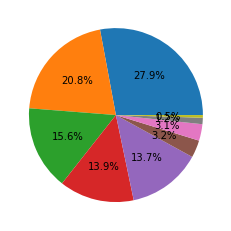

In [43]:
#distribution of sample df2
plt.pie(df2['label'].value_counts(), autopct = '%1.1f%%');

In [44]:
# Splitting x and y variables
x2 = df2[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y2 = df2['label'] #dependent features
print(x2.shape, y2.shape)

(40000, 6) (40000,)


In [45]:
#splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)
print(x2_train.shape, y2_train.shape, x2_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y2_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x2_train,y2_train = oversample.fit_resample(x2_train,y2_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y2_train),'\n')

#importing Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(random_state=1000,max_depth=15,min_samples_leaf = 1)

classifier_dtc.fit(x2_train, y2_train)
y2_pred = classifier_dtc.predict(x2_test)
print('model.predict :',y2_pred)
print('model.score :', classifier_dtc.score(x2_train, y2_train))

from sklearn.metrics import accuracy_score
accuracy_dtc = accuracy_score(y2_test, y2_pred)
print('Accuracy : ',accuracy_dtc)

from sklearn.model_selection import cross_val_score
cv_scores_dtc = cross_val_score(classifier_dtc, x2, y2, cv=5)
print('Cross Validation scores :', cv_scores_dtc)

mean_cv_dtc = (np.mean(cv_scores_dtc))*100
print('Mean cv :',mean_cv_dtc)

(28000, 6) (28000,) (12000, 6)
Classes and number of values in trainset before SMOTE: Counter({1: 7876, 4: 5817, 7: 4356, 6: 3877, 5: 3863, 9: 897, 8: 835, 3: 338, 2: 141}) 

Classes and number of values in trainset after SMOTE: Counter({1: 7876, 5: 7876, 7: 7876, 4: 7876, 3: 7876, 6: 7876, 8: 7876, 9: 7876, 2: 7876}) 

model.predict : [1 4 1 ... 9 7 7]
model.score : 0.9457987698211162
Accuracy :  0.8805833333333334
Cross Validation scores : [0.939    0.933625 0.936375 0.93625  0.9395  ]
Mean cv : 93.69500000000001


In [46]:
f1_score_dtc = f1_score(y2_test, y2_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_dtc))

precision_score_dtc = precision_score(y2_test, y2_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_dtc))

recall_score_dtc = recall_score(y2_test, y2_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_dtc))

F1-score (average = weighted): 0.89
Precision (average = weighted): 0.90
Recall (average = weighted): 0.88


### Sample 3 - df3 - Random Forest Classifier

In [47]:
import random
df3 = new_df.sample(40000)

In [48]:
df3['label'].value_counts()

1    11128
4     8311
7     6381
5     5578
6     5498
8     1236
9     1231
3      469
2      168
Name: label, dtype: int64

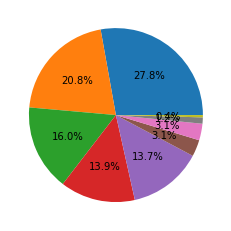

In [75]:
#distribution of sample df3
plt.pie(df3['label'].value_counts(), autopct = '%1.1f%%');

In [49]:
# Splitting x and y variables
x3 = df3[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y3 = df3['label'] #dependent features
print(x3.shape, y3.shape)

(40000, 6) (40000,)


In [50]:
#splitting the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y3_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train,y3_train = oversample.fit_resample(x3_train,y3_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y3_train),'\n')

#import random forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=20, random_state=23)

classifier_rf.fit(x3_train, y3_train)
y3_pred = classifier_rf.predict(x3_test)
print('model.predict :',y3_pred)
print('model.score :', classifier_rf.score(x3_train, y3_train))

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y3_test, y3_pred)
print('Accuracy : ',accuracy_rf)

from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(classifier_rf, x3, y3, cv=5)
print('Cross Validation scores :', cv_scores_rf)

mean_accuracy_rf = (np.mean(cv_scores_rf))*100
print('Mean Accuracy :',mean_accuracy_rf)

Classes and number of values in trainset before SMOTE: Counter({1: 7823, 4: 5839, 7: 4488, 5: 3878, 6: 3823, 8: 876, 9: 848, 3: 311, 2: 114}) 

Classes and number of values in trainset after SMOTE: Counter({9: 7823, 7: 7823, 6: 7823, 4: 7823, 5: 7823, 1: 7823, 8: 7823, 3: 7823, 2: 7823}) 

model.predict : [8 4 5 ... 4 4 4]
model.score : 0.9998721718010993
Accuracy :  0.92075
Cross Validation scores : [0.936875 0.937125 0.94125  0.94425  0.9305  ]
Mean Accuracy : 93.80000000000001


In [51]:
f1_score_rf = f1_score(y3_test, y3_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_rf))

precision_score_rf = precision_score(y3_test, y3_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_rf))

recall_score_rf = recall_score(y3_test, y3_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_rf))

F1-score (average = weighted): 0.92
Precision (average = weighted): 0.92
Recall (average = weighted): 0.92


### Sample 4 - df4 - Support Vector Classifier

In [52]:
import random
df4 = new_df.sample(40000)

In [53]:
df4['label'].value_counts()

1    10993
4     8368
7     6357
6     5586
5     5580
9     1320
8     1129
3      482
2      185
Name: label, dtype: int64

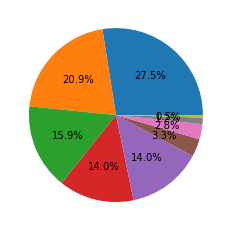

In [76]:
#distribution of sample df4
plt.pie(df4['label'].value_counts(), autopct = '%1.1f%%');

In [54]:
# Splitting x and y variables
x4 = df4[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y4 = df4['label'] #dependent features
print(x4.shape, y4.shape)

(40000, 6) (40000,)


In [55]:
#splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y4_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x4_train,y4_train = oversample.fit_resample(x4_train,y4_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y4_train),'\n')

#importing svc
from sklearn.svm import SVC
classifier_svc=SVC(decision_function_shape='ovo')


classifier_svc.fit(x4_train, y4_train)
y4_pred = classifier_svc.predict(x4_test)
print('model.predict :',y4_pred)
print('model.score :', classifier_svc.score(x4_train, y4_train))

from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y4_test, y4_pred)
print('Accuracy : ',accuracy_svc)

from sklearn.model_selection import cross_val_score
cv_scores_svc = cross_val_score(classifier_svc, x4, y4, cv=5)
print('Cross Validation scores :', cv_scores_svc)

mean_cv_svc = (np.mean(cv_scores_svc))*100
print('Mean cv :',mean_cv_svc)

Classes and number of values in trainset before SMOTE: Counter({1: 7670, 4: 5866, 7: 4485, 5: 3906, 6: 3892, 9: 925, 8: 783, 3: 339, 2: 134}) 

Classes and number of values in trainset after SMOTE: Counter({1: 7670, 4: 7670, 7: 7670, 6: 7670, 8: 7670, 5: 7670, 9: 7670, 2: 7670, 3: 7670}) 

model.predict : [1 5 9 ... 1 8 5]
model.score : 0.7504852962480081
Accuracy :  0.6705833333333333
Cross Validation scores : [0.722    0.707375 0.7115   0.716375 0.712125]
Mean cv : 71.38749999999999


In [56]:
f1_score_svc = f1_score(y4_test, y4_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_svc))

precision_score_svc = precision_score(y4_test, y4_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_svc))

recall_score_svc = recall_score(y4_test, y4_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_svc))

F1-score (average = weighted): 0.68
Precision (average = weighted): 0.71
Recall (average = weighted): 0.67


### Sample 5 - df5 - KNearest Neighbors

In [57]:
import random
df5 = new_df.sample(40000)

In [58]:
df5['label'].value_counts()

1    11185
4     8300
7     6278
5     5590
6     5524
9     1323
8     1154
3      479
2      167
Name: label, dtype: int64

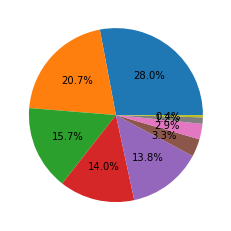

In [77]:
#distribution of sample df5
plt.pie(df5['label'].value_counts(), autopct = '%1.1f%%');

In [59]:
# Splitting x and y variables
x5 = df5[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y5 = df5['label'] #dependent features

In [60]:
#splitting the data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y5_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x5_train,y5_train = oversample.fit_resample(x5_train,y5_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y5_train),'\n')

#importing kneighbours classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier()

classifier_knn.fit(x5_train, y5_train)
y5_pred = classifier_knn.predict(x5_test)
print('model.predict :',y5_pred)
print('model.score :', classifier_knn.score(x5_train, y5_train))

from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y5_test, y5_pred)
print('Accuracy : ',accuracy_knn)

from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(classifier_knn, x5, y5, cv=5)
print('Cross Validation scores :', cv_scores_knn)

mean_cv_knn = (np.mean(cv_scores_knn))*100
print('Mean cv :',mean_cv_knn)

Classes and number of values in trainset before SMOTE: Counter({1: 7786, 4: 5749, 7: 4420, 5: 3974, 6: 3912, 9: 921, 8: 784, 3: 328, 2: 126}) 

Classes and number of values in trainset after SMOTE: Counter({4: 7786, 7: 7786, 6: 7786, 1: 7786, 2: 7786, 5: 7786, 3: 7786, 9: 7786, 8: 7786}) 

model.predict : [9 7 8 ... 5 7 1]
model.score : 0.937309130347918
Accuracy :  0.7680833333333333
Cross Validation scores : [0.7995   0.79975  0.79275  0.803375 0.7985  ]
Mean cv : 79.8775


In [61]:
f1_score_knn = f1_score(y5_test, y5_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_knn))

precision_score_knn = precision_score(y5_test, y5_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_knn))

recall_score_knn = recall_score(y5_test, y5_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_knn))

F1-score (average = weighted): 0.78
Precision (average = weighted): 0.79
Recall (average = weighted): 0.77


### Sample 6 - df6 - AdaBoost Classifier

In [62]:
import random
df6 = new_df.sample(40000)

In [63]:
df6['label'].value_counts()

1    11071
4     8423
7     6240
6     5588
5     5512
9     1322
8     1180
3      489
2      175
Name: label, dtype: int64

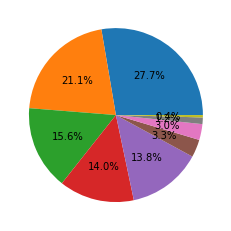

In [78]:
#distribution of sample df6
plt.pie(df6['label'].value_counts(), autopct = '%1.1f%%');

In [64]:
# Splitting x and y variables
x6 = df6[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y6 = df6['label'] #dependent features

In [65]:
###### splitting the data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y6_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x6_train,y6_train = oversample.fit_resample(x6_train,y6_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y6_train),'\n')


from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier()

classifier_ada.fit(x6_train, y6_train)
y6_pred = classifier_ada.predict(x6_test)
print('model.predict :',y6_pred)
print('model.score :', classifier_ada.score(x6_train, y6_train))

from sklearn.metrics import accuracy_score
accuracy_ada = accuracy_score(y6_test, y6_pred)
print('Accuracy : ',accuracy_ada)

from sklearn.model_selection import cross_val_score
cv_scores_ada = cross_val_score(classifier_ada, x6, y6, cv=5)
print('Cross Validation scores :', cv_scores_ada)

mean_cv_ada = (np.mean(cv_scores_ada))*100
print('Mean cv :',mean_cv_ada)

Classes and number of values in trainset before SMOTE: Counter({1: 7668, 4: 5890, 7: 4386, 5: 3913, 6: 3897, 9: 942, 8: 812, 3: 361, 2: 131}) 

Classes and number of values in trainset after SMOTE: Counter({7: 7668, 1: 7668, 6: 7668, 4: 7668, 2: 7668, 5: 7668, 8: 7668, 3: 7668, 9: 7668}) 

model.predict : [1 5 4 ... 9 5 7]
model.score : 0.43169303889178695
Accuracy :  0.40108333333333335
Cross Validation scores : [0.4045   0.471625 0.52675  0.5295   0.50475 ]
Mean cv : 48.7425


In [66]:
f1_score_ada = f1_score(y6_test, y6_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_ada))

precision_score_ada = precision_score(y6_test, y6_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_ada))

recall_score_ada = recall_score(y6_test, y6_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_ada))

F1-score (average = weighted): 0.43
Precision (average = weighted): 0.51
Recall (average = weighted): 0.40


## MAKING A DATAFRAME OF ALL THE SCORES FOR EVERY MODEL BUILT

In [85]:
#Making a dataframe of all the scores for every model
scores = [("Logistic Regression", accuracy_lr,mean_cv_lr, f1_score_lr,precision_score_lr,recall_score_lr),
           ("Decision Tree",accuracy_dtc,mean_cv_dtc, f1_score_dtc,precision_score_dtc,recall_score_dtc),
           ("Random Forest", accuracy_rf,mean_accuracy_rf, f1_score_rf,precision_score_rf,recall_score_rf),
           ("KNN", accuracy_knn,mean_cv_knn, f1_score_knn,precision_score_knn,recall_score_knn),
           ('Support vector machine',accuracy_svc,mean_cv_svc, f1_score_svc,precision_score_svc,recall_score_svc),
           ('AdaBoost Classifier',accuracy_ada,mean_cv_ada, f1_score_ada,precision_score_ada,recall_score_ada)]

Scores =pd.DataFrame(data = scores, columns=['Model Name','Test Accuracy','Mean Cross validation score', 'F1 Score', 'Precision', 'Recall'])
Scores.set_index('Model Name', inplace = True)

In [86]:
Scores.style.background_gradient(cmap='YlGn')

,Test Accuracy,Mean Cross validation score,F1 Score,Precision,Recall
Model Name,,,,,
Logistic Regression,0.318750,42.242500,0.327531,0.441404,0.318750
Decision Tree,0.880583,93.695000,0.885856,0.895144,0.880583
Random Forest,0.920750,93.800000,0.921957,0.923867,0.920750
KNN,0.768083,79.877500,0.775313,0.788165,0.768083
Support vector machine,0.670583,71.387500,0.684214,0.712492,0.670583
AdaBoost Classifier,0.401083,48.742500,0.425586,0.508722,0.401083


### Conclusion:
We see that Random Forest gives the highest accuracy.